# Optimize the vertical KB mirror at the TES beamline in Shadow3

In [1]:
%run -i ../../../examples/prepare_bluesky.py
%run -i ../../../examples/prepare_tes_shadow.py

kbs = [kbv.x_rot, kbv.offz]
kb_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]]) 

for dof in kbs:
    dof.kind = "hinted"

In [2]:
from bloptools.experiments.shadow import tes

boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=kbs, 
                                             dets=[w9],
                                             bounds=kb_bounds, 
                                             db=db, 
                                             experiment=tes
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


   kbv_x_rot  kbv_offz    fitness
0  -0.000024 -0.221976  31.221931
1   0.049976 -0.444198  25.985952
2   0.074976 -0.333087  26.312651
3   0.099976  0.111357  25.473839
4   0.024976  0.444691  18.389156
5  -0.025024  0.333580  29.216857
6  -0.050024  0.222468  28.965677
7  -0.075024  0.000246  28.153516


('d58e7724-6412-46bd-bc94-3cc3eba0338f',)

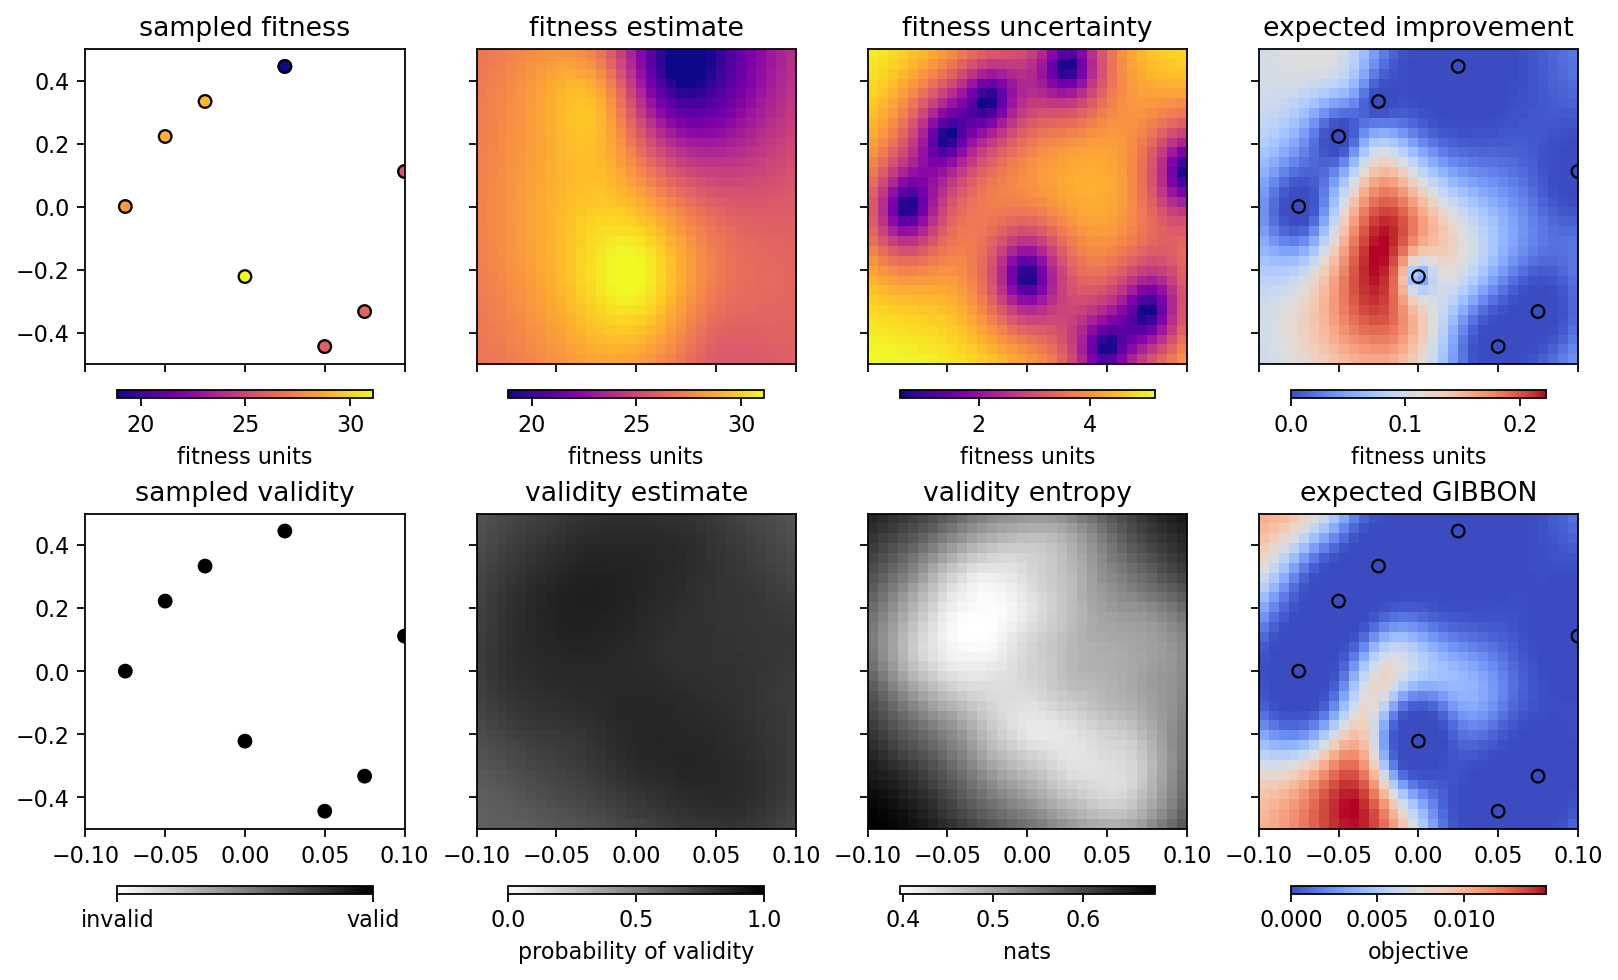

In [3]:
boa.plot_state(gridded=True)

Maximizing the expected improvement:

learning with strategy "eI" ...


    kbv_x_rot  kbv_offz    fitness
8   -0.068294  0.410602  27.862153
9   -0.020716 -0.101885  30.188331
10   0.011541 -0.206514  30.827197
11  -0.015045 -0.376301  29.811235


    kbv_x_rot  kbv_offz    fitness
12   0.001860 -0.264056  31.126319
13   0.008292 -0.112642  30.897747
14  -0.010766 -0.211675  30.664737
15  -0.068334 -0.406540  28.797190


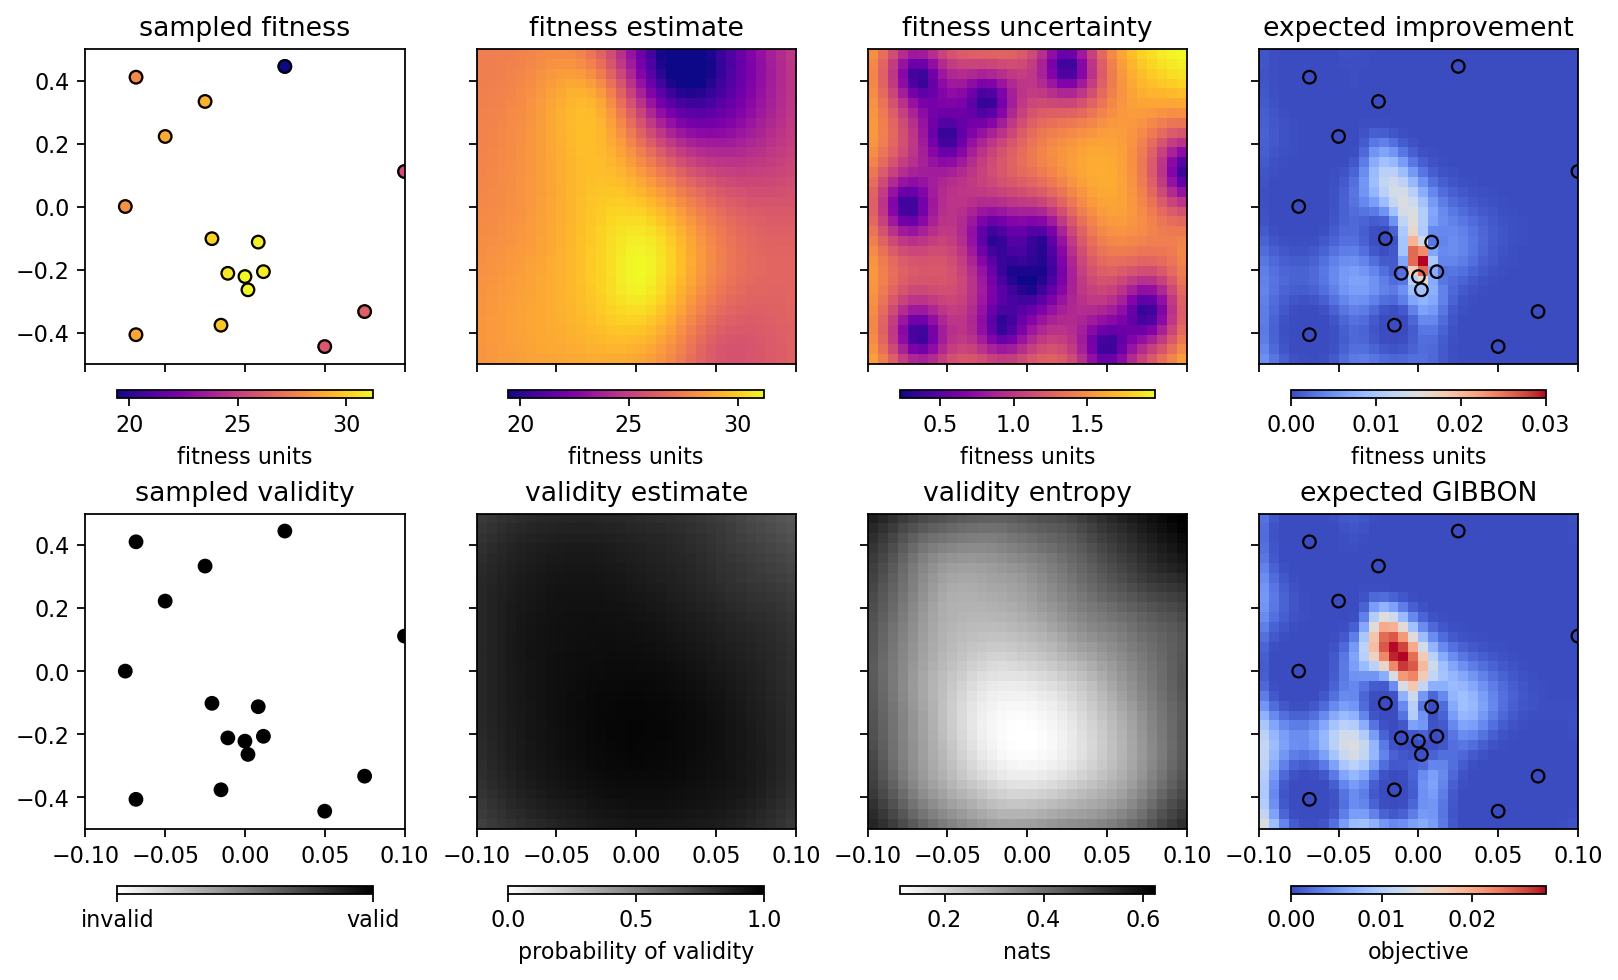

In [4]:
RE(boa.learn(strategy='eI', n_iter=2, n_per_iter=4))
boa.plot_state(gridded=True)